# Non Normed

In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import reader as _reader
from src import visualization as _visualization
import numpy as np
import sklearn
from sklearn.cluster import KMeans


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
X = _reader.readWord2Vec(normed=False)
print(X[:10])
print(X.shape)

['word2vec.csv', 'bags.csv', 'health.txt', 'health-dataset.zip', 'health-dataset']
        0         1         2         3         4         5         6    \
0  0.013595 -0.068772 -0.013126  0.006024  0.037922 -0.020872 -0.010325   
1  0.025009 -0.025586  0.012237  0.020567  0.014523 -0.018705 -0.058395   
2  0.031544 -0.025882 -0.060617  0.035992  0.037742 -0.021132 -0.041023   
3  0.058714 -0.080251 -0.026101  0.060461  0.016714 -0.005205 -0.037441   
4  0.023366 -0.065667 -0.015601  0.022602  0.030365 -0.060590 -0.071055   
5  0.005894 -0.074649 -0.001171  0.014182  0.029530  0.025231 -0.022154   
6 -0.011415 -0.021273 -0.043368 -0.001785 -0.031960 -0.020326 -0.071195   
7  0.049307 -0.024540 -0.011390  0.010187  0.017417 -0.000969 -0.020045   
8  0.052583 -0.090634 -0.025581  0.003195  0.031459  0.002013  0.025611   
9  0.061589 -0.026826 -0.020978  0.046825  0.002022 -0.016367 -0.058929   

        7         8         9      ...          118       119       120  \
0  0.008019  0.0

## Creating a Dendogram
We are using lastP as metric for the linkage method: 

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

`https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html`

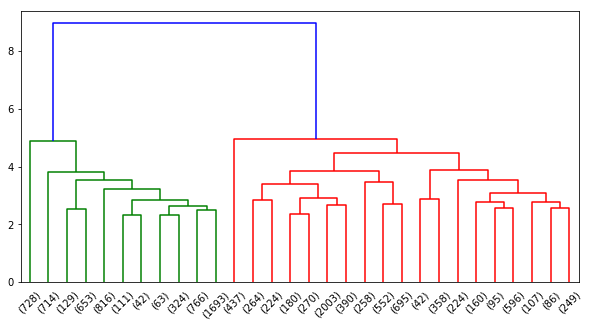

In [3]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(X)

## Selecting the Cut 
Based on the above dendogram we will put a cut off line. 
`max_d = 2`

In [4]:
reload(_optimizer)
clusters = _optimizer.fcluster_cut(X, max_d=2)
clusters.shape, np.unique(clusters)

((13229,),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype=int32))